In [1]:
## import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## import warning
import warnings
warnings.filterwarnings("ignore")


# <font color ='green'>Step 1: Read & understand the data

In [38]:
## read the data
df_shipment = pd.read_csv("SCMS_Delivery_History_Dataset.csv")
df_shipment.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [41]:
int(df_shipment['Weight (Kilograms)'].loc[1])

358

In [14]:
# check data size
df_shipment.shape

(10324, 33)

In [4]:
## check data info
df_shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

Weight (Kilograms) is object column instead of float. So need to further analyse

In [5]:
df_shipment['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '1547', 'See DN-4282 (ID#:83919)', '1392'],
      dtype=object)

In [6]:
df_shipment['Freight Cost (USD)'].unique()

array(['780.34', '4521.5', '1653.78', ..., '26180', '3410',
       'See DN-4282 (ID#:83919)'], dtype=object)

#### Observation: 
    1. It is observed that few rows in both the columns have string data.
    2. For rows around 2444 and 2445 in columns 'Weight' and 'Frieght cost' respectively, instead of value 
    reference of other row value is given. SO it is requied to fill those cell with that reference value.

In [33]:
## weight_data_under_scrutiny = df_shipment[df_shipment['Weight (Kilograms)'].str.contains('See', na = False)]
## weight_data_under_scrutiny.head()

In [9]:
string = 'See DN-4177 (ID#:82804)'
string.split(' ')[2].split(':')[1][:-1]

'82804'

In [20]:
def impute(x):
    if 'See' in x:
        x1 = x.split(' ')[2].split(':')[1][:-1]
    else: 
        x1 = x
    return x1

In [27]:
df_shipment['Weight (Kilograms)'] = df_shipment['Weight (Kilograms)'].apply(impute)

In [28]:
df_shipment['Freight Cost (USD)'] = df_shipment['Freight Cost (USD)'].apply(impute)

In [42]:
df_shipment['Weight (Kilograms)'] = df_shipment['Weight (Kilograms)'].apply(lambda x:int(df_shipment['Weight (Kilograms)'].loc[x.split(' ')[2].split(':')[1][:-1]]) if 'See' in x else x )

KeyError: '1281'

In [44]:
df_shipment.loc[8875]

ID                                                                          85041
Project Code                                                           103-ZW-T30
PQ #                                                                    FPQ-15197
PO / SO #                                                                SO-50020
ASN/DN #                                                                  DN-4307
Country                                                                  Zimbabwe
Managed By                                                               PMO - US
Fulfill Via                                                              From RDC
Vendor INCO Term                                                   N/A - From RDC
Shipment Mode                                                               Truck
PQ First Sent to Client Date                                             10/16/14
PO Sent to Vendor Date                                             N/A - From RDC
Scheduled Delive

In [29]:
df_shipment.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,83920,83920,705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,83921,83921,161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [37]:
df_shipment.loc[df_shipment['ID'] == 83920]

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
7935,83920,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21000,41790.0,1.99,0.03,"Mylan, H-12 & H-13, India",Yes,25880,46111.55,49.19


In [30]:
df_shipment[df_shipment['ASN/DN #']== 'DN-4307']

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
7935,83920,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21000,41790.00,1.99,0.03,"Mylan, H-12 & H-13, India",Yes,25880,46111.55,49.19
8875,85041,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,2741,5454.59,1.99,0.03,"Mylan, H-12 & H-13, India",No,83920,83920,6.42
8876,85042,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,9262,18431.38,1.99,0.03,"Cipla, Goa, India",No,83920,83920,21.69
10318,86817,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",No,83920,83920,869.66
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,83920,83920,705.79


In [31]:
df_shipment[df_shipment['ASN/DN #']== 'DN-4313']

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
7936,83921,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,30,6750,31185.00,4.62,0.15,"Hetero, Jadcherla, unit 5, IN",Yes,4426,14734.92,36.70
8399,84479,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,18928,123410.56,6.52,0.11,"Aurobindo Unit III, India",No,83921,83921,145.25
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,83921,83921,161.71


In [57]:
df_shipment[df_shipment['Weight (Kilograms)']=='See DN-4282 (ID#:83919)']

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10317,86816,151-NG-T30,FPQ-16313,SO-51440,DN-4282,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,...,30,6724,20978.88,3.12,0.1,"Strides, Bangalore, India.",No,See DN-4282 (ID#:83919),See DN-4282 (ID#:83919),24.69


In [ ]:
## For weight look for ID 83919

In [58]:
df_shipment[df_shipment['ID']== 83919]

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
7934,83919,151-NG-T30,FPQ-16313,SO-51440,DN-4282,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,...,30,55851,256356.09,4.59,0.15,Hetero Unit III Hyderabad IN,Yes,6183,47281.56,301.73


In [ ]:
# for observation number 10317 replace weight column string by 6183

In [59]:
df_shipment['Weight (Kilograms)']= df_shipment['Weight (Kilograms)'].replace('See DN-4282 (ID#:83919)',6183)
df_shipment.loc[10317]

ID                                                          86816
Project Code                                           151-NG-T30
PQ #                                                    FPQ-16313
PO / SO #                                                SO-51440
ASN/DN #                                                  DN-4282
Country                                                   Nigeria
Managed By                                               PMO - US
Fulfill Via                                              From RDC
Vendor INCO Term                                   N/A - From RDC
Shipment Mode                                                 Air
PQ First Sent to Client Date                               5/4/15
PO Sent to Vendor Date                             N/A - From RDC
Scheduled Delivery Date                                 30-Jun-15
Delivered to Client Date                                22-Jun-15
Delivery Recorded Date                                  29-Jun-15
Product Gr

In [60]:
# check unique values for Weight (Kilograms) column
df_shipment['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '1547', 6183, '1392'], dtype=object)

In [61]:
# Convert Weight (Kilograms) column to float 'See ASN-93 (ID#:1281)'
df_shipment['Weight (Kilograms)'].astype('float64')

ValueError: could not convert string to float: 'See ASN-93 (ID#:1281)'

In [5]:
# check statistics for numeric columns
df_shipment.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


# <font color = 'green'> Step 2: Data cleaning

In [6]:
# check for null values
df_shipment.isnull().sum()[df_shipment.isnull().sum()>0]

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

In [7]:
# find percent null values
null_count = pd.DataFrame(df_shipment.isnull().sum()[df_shipment.isnull().sum()>0], columns=["null_count"])
null_count["percent_null"] = null_count["null_count"]*100/df_shipment.shape[0]
null_count

,null_count,percent_null
Shipment Mode,360,3.487021
Dosage,1736,16.815188
Line Item Insurance (USD),287,2.779930


In [8]:
# get the columns with null values
null_cols = df_shipment.isnull().sum()[df_shipment.isnull().sum()>0].index.to_list()
null_cols

['Shipment Mode', 'Dosage', 'Line Item Insurance (USD)']

In [9]:
# check the null_cols
df_shipment[null_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Shipment Mode              9964 non-null   object 
 1   Dosage                     8588 non-null   object 
 2   Line Item Insurance (USD)  10037 non-null  float64
dtypes: float64(1), object(2)
memory usage: 242.1+ KB


In [10]:
# check the null_cols
df_shipment[null_cols].tail()

,Shipment Mode,Dosage,Line Item Insurance (USD)
10319,Truck,30/50/60mg,705.79
10320,Truck,150/300mg,161.71
10321,Truck,600/300/300mg,5284.04
10322,Truck,150/300mg,134.03
10323,Truck,30/60mg,85.82


### <font color = 'blue'> Null Columns analysis

In [11]:
# Shipment Mode has around 3.5% null values
df_shipment["Shipment Mode"].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

#### Observation: There are 4 shipment modes with 'Air' mode is dominant. So will impute Na values of the column by it. 

In [12]:
# Dosage has around 17% null values
df_shipment["Dosage"].value_counts()

300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
100/25mg            73
60/30mg             73
600/300mg           63
1mg/ml              54
300/100mg           54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
500/25mg            13
80mg/ml             13
20/120mg            12
60/100/12mg         12
2g                  11
500mg               10
150/300+200mg        8
133.3/33.3m

#### Observation: Dosage column has no any predominant category so will create new category 'Other' and impute NA with it 

In [13]:
#Line Item Insurance (USD) has around 3% null values
df_shipment["Line Item Insurance (USD)"].describe()

count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

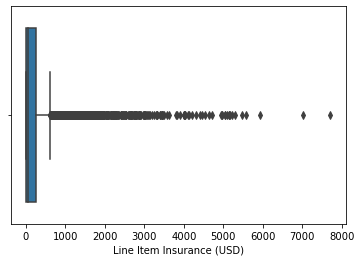

In [14]:
sns.boxplot(x=df_shipment["Line Item Insurance (USD)"])
plt.show()

#### Observation: Line Item Insurance (USD) has many outliers so will impute NA by median as mean will be affected by outliers.

### <font color = 'blue'> Null Columns imputation

In [15]:
# Shipment Mode 
df_shipment["Shipment Mode"] = df_shipment["Shipment Mode"].fillna(df_shipment["Shipment Mode"].mode()[0])

# check nulls for Shipment Mode
df_shipment["Shipment Mode"].isnull().sum()

0

In [16]:
# Shipment Mode 
df_shipment["Dosage"] = df_shipment["Dosage"].fillna('Other')

# check nulls for Shipment Mode
print("Null values in 'Dosage' column = ",df_shipment["Dosage"].isnull().sum())

# Check categories
print("categories in 'Dosage' column are = ",df_shipment["Dosage"].value_counts().index)

Null values in 'Dosage' column =  0
categories in 'Dosage' column are =  Index(['Other', '300mg', '200mg', '600mg', '150/300mg', '150/300/200mg',
       '10mg/ml', '150mg', '200/50mg', '300/300mg', '600/300/300mg',
       '150/200/30mg', '100mg', '50mg', '200/300mg', '80/20mg/ml', '400mg',
       '20mg/ml', '30mg', '600/200/300mg', '150/30mg', '30/50/60mg',
       '300/200mg', '30/60mg', '250mg', '100/25mg', '60/30mg', '600/300mg',
       '1mg/ml', '300/100mg', '20mg', '25mg', '15mg', '30mg/ml',
       '300/150/300mg', '30/50/6mg', '30/6mg', '500/25mg', '80mg/ml',
       '60/100/12mg', '20/120mg', '2g', '500mg', '150/300+200mg',
       '133.3/33.3mg', '150/300mg+600mg', '40mg', '60mg', '60/12mg',
       '150/200/40mg', '125mg', '50+153mg', '600mg/2ml', '50mg/g',
       '150/300+300mg'],
      dtype='object')


In [17]:
# Shipment Mode 
df_shipment["Line Item Insurance (USD)"] = df_shipment["Line Item Insurance (USD)"].fillna(df_shipment["Line Item Insurance (USD)"].median())

# check nulls for Shipment Mode
df_shipment["Line Item Insurance (USD)"].isnull().sum()

0

In [18]:
## Check null count for dataframe
df_shipment.isnull().sum().sum()

0

# <font color = 'green'> Step 3: EDA

In [19]:
df_shipment.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.04
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.04
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.04
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.04
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.04


### <font color = 'blue'> Categorical columns visualization

In [20]:
df_categorical = df_shipment.select_dtypes(exclude=['float64','datetime64','int64'])
df_categorical.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

In [21]:
# Country
df_shipment.Country.value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                  14
Benin                   13
Libya                    8
Lebanon                  8
Angola                   7
Liberia                  6
Lesotho                  4
Sierra Leone             4
Afghanistan              3
Senegal                  3
T

Visualize the countries according to numer of shipments in the range of (1-10), (11-100),(101 onwards)

In [31]:
countrywise_shipment = pd.DataFrame(df_shipment.Country.value_counts()).reset_index() 
countrywise_shipment.rename(columns = {'index':'country_name','Country':'shipment_count'}, inplace = True)
countrywise_shipment

,country_name,shipment_count
0,South Africa,1406
1,Nigeria,1194
2,Côte d'Ivoire,1083
3,Uganda,779
4,Vietnam,688
5,Zambia,683
6,Haiti,655
7,Mozambique,631
8,Zimbabwe,538
9,Tanzania,519


In [ ]:
# countries with <=10 shipments

In [39]:
countrywise_shipment_upto10 = countrywise_shipment[countrywise_shipment['shipment_count']<=10]
countrywise_shipment_11to100 = countrywise_shipment[(countrywise_shipment['shipment_count']>10) & (countrywise_shipment['shipment_count']<=100) ]
countrywise_shipment_101above = countrywise_shipment[countrywise_shipment['shipment_count']>101]

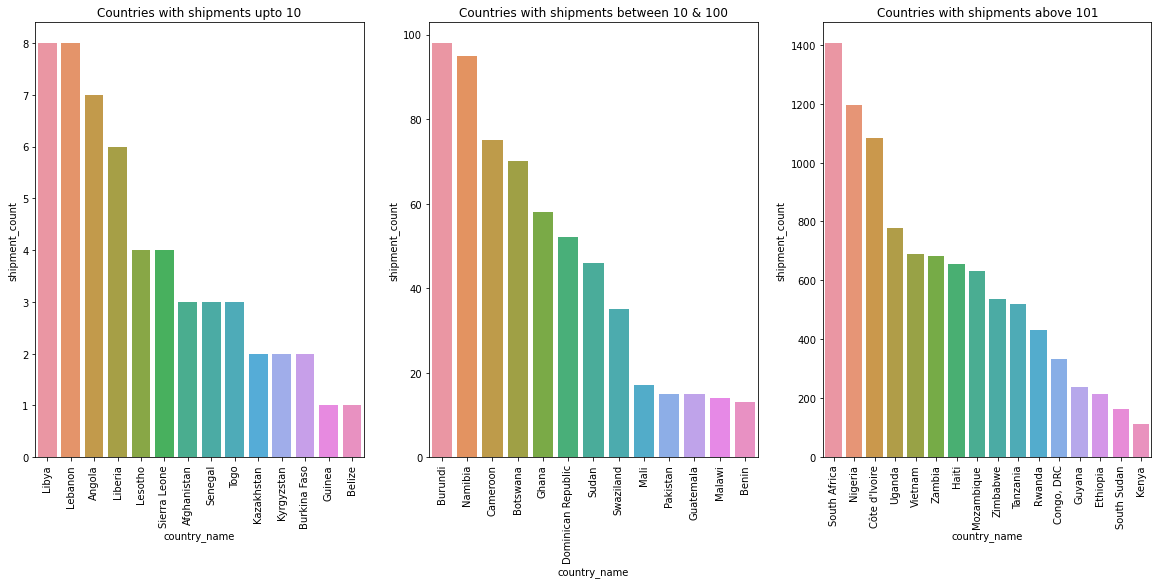

In [42]:
plt.figure(figsize=[20,8])
           
plt.subplot(1,3,1)
sns.barplot(x = 'country_name', y = 'shipment_count', data = countrywise_shipment_upto10)
plt.xticks(rotation = 90)
plt.title("Countries with shipments upto 10")

plt.subplot(1,3,2)
sns.barplot(x = 'country_name', y = 'shipment_count', data = countrywise_shipment_11to100)
plt.xticks(rotation = 90)
plt.title("Countries with shipments between 10 & 100")

plt.subplot(1,3,3)
sns.barplot(x = 'country_name', y = 'shipment_count', data = countrywise_shipment_101above)
plt.xticks(rotation = 90)
plt.title("Countries with shipments above 101")
           
plt.show()

In [44]:
df_categorical.columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')

In [ ]:
# Managed By

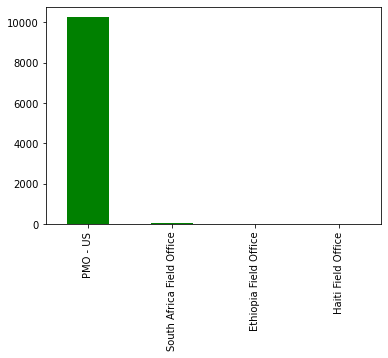

In [47]:
df_shipment["Managed By"].value_counts().plot.bar(color='green')
plt.show()

#### Observation: 
    Most of the shipments are managed by PMO-US

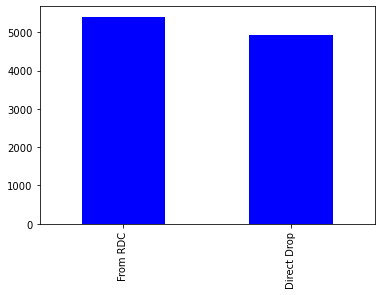

In [49]:
# 'Fulfill Via'
df_shipment['Fulfill Via'].value_counts().plot.bar(color='blue')
plt.show()

#### Observation: 
    Both fulfill modes have relatively similar count.

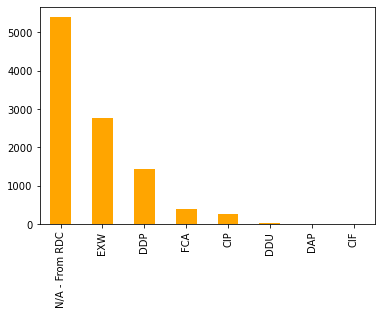

In [51]:
# 'Vendor INCO Term'
df_shipment['Vendor INCO Term'].value_counts().plot.bar(color='orange')
plt.show()

#### Observation:
    1. For RDC fulfill mode Vendor INCO Term is NA, has highest number of count.
    2. EXW, DDP are the next higher Vendor INCO Term.

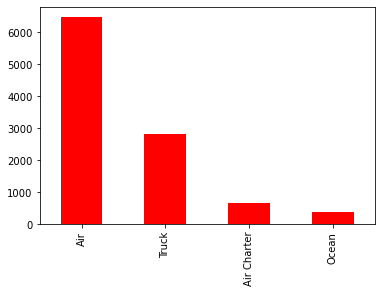

In [52]:
# 'Shipment Mode'
df_shipment['Shipment Mode'].value_counts().plot.bar(color='red')
plt.show()

#### Observation:
    1. Air mode is the mostly used shipment mode.
    2. Truck mode is follows the Air mode.

In [53]:
# 'PQ First Sent to Client Date'
df_shipment['PQ First Sent to Client Date'].value_counts()

Pre-PQ Process       2476
9/11/14               205
Date Not Captured     205
7/11/13               173
4/30/14               123
                     ... 
6/15/12                 1
2/2/12                  1
9/16/11                 1
3/22/11                 1
1/18/13                 1
Name: PQ First Sent to Client Date, Length: 765, dtype: int64